<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="240" height="240" align="center"/>












SAKR Walid

28615645

# MLA 703. RNN-LSTM et architectures avancées [Analyse de sentiment]

In [ ]:
# Dans ce notebook, nous allons nous intéresser à des tâches d'analyse de sentiments
# -> c'est à dire prédire un label de sentiment (ici positif ou négatif) à partir d'un texte

# Ce notebook vise à approfondir : 
# - L'application du DL sur des données textuelles
# - La compréhension des architectures RNN avancées comme les LSTM et les mécanismes d'attention
#

# 1. Importation des modules

In [1]:
# On importe les librairies usuelless
import math
import numpy as np
import matplotlib.pyplot as plt

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
from tensorflow.keras.layers import Dense , Input , SimpleRNN, LSTM , Embedding, Dropout
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
# On importe les librairies pour l'évaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

## Simple RNN


In [ ]:

#tf.random.set_seed(11)
num_words = 1000
max_len   =  80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)
# On padde les séquences

#print("La phrase avant padding est : \n {}". format(x_train[0]))
# On padde les séquence de mot
max_len       = 80
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

#print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))
#print(len(x_train))    

In [ ]:

#from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

embed_size = 20                                                   # dimension de l'embedding
RNN_size   = 40

# Example d'architecture pour le réseau RNN simple avec dropout
model = Sequential()
model.add(Embedding(num_words, embed_size))                 # layer embedding
model.add(SimpleRNN(RNN_size, return_sequences = False))    # layer RNN
model.add(Dropout(0.25))                                    # layer Dropout
model.add(Dense(1))                                         # layer Dense

# On affiche l'architecture de notre modèle
model.summary()

# On spécifie la fonction de perte, l'optimiseur, et la fonction d'évaluation
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0009, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 20)          20000     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 40)                2440      
                                                                 
 dropout_7 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 22,481
Trainable params: 22,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# On entraine le réseau
batch_size = 32                                                             # tailles des mini-batch
epochs = 15                                                      # nombre d'époques
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) # on entraine

Epoch 1/15
53/53 [==============================] - 3s 25ms/step - loss: 1.0404 - accuracy: 0.5170 - val_loss: 0.7165 - val_accuracy: 0.5134
Epoch 2/15
53/53 [==============================] - 1s 20ms/step - loss: 0.6769 - accuracy: 0.6148 - val_loss: 0.7054 - val_accuracy: 0.5508
Epoch 3/15
53/53 [==============================] - 1s 20ms/step - loss: 0.5627 - accuracy: 0.6977 - val_loss: 0.7066 - val_accuracy: 0.5401
Epoch 4/15
53/53 [==============================] - 1s 20ms/step - loss: 0.4512 - accuracy: 0.8193 - val_loss: 0.8723 - val_accuracy: 0.6043
Epoch 5/15
53/53 [==============================] - 1s 21ms/step - loss: 0.2934 - accuracy: 0.8927 - val_loss: 0.8029 - val_accuracy: 0.6952
Epoch 6/15
53/53 [==============================] - 1s 20ms/step - loss: 0.1687 - accuracy: 0.9326 - val_loss: 1.0372 - val_accuracy: 0.7166
Epoch 7/15
53/53 [==============================] - 1s 20ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 1.3967 - val_accuracy: 0.6898
Epoch 8/15
53

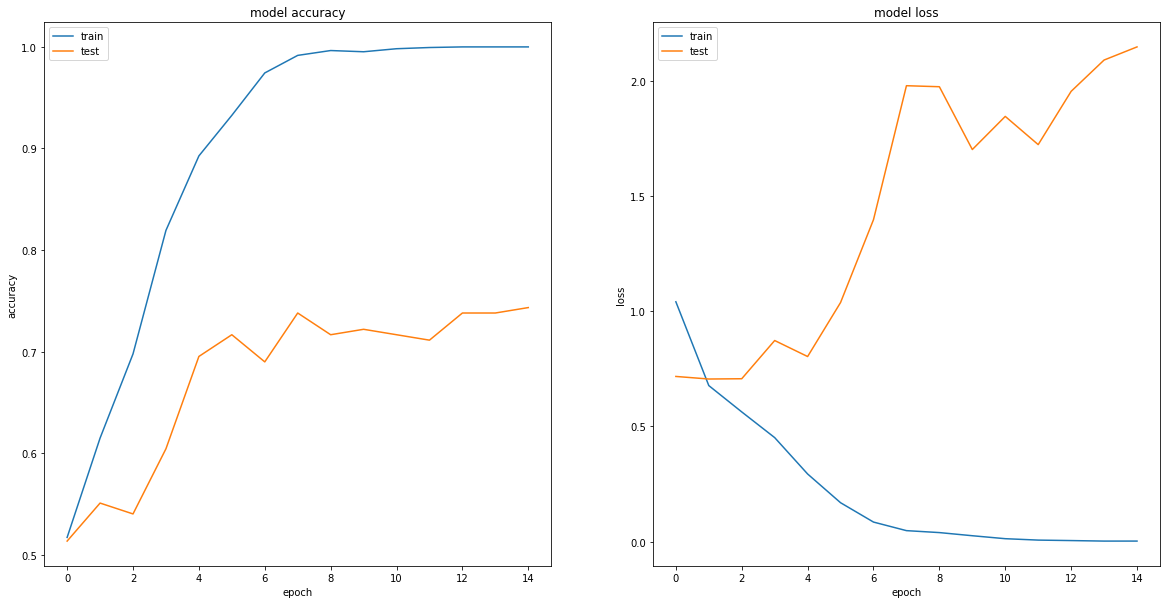

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Remarques :**

Le taux d'accuracy en train est de 97% or en test elle est quasi aléatoire avec une accuracy de 55% (c'est un cas d'overffiting).

In [ ]:
history

# On prédit sur l'ensemble de test

# On prédit sur les données de test
y_hat = model.predict(x_test)

# On tranforme les prédictions en labels
i_pos = [i for i in range(len(y_hat)) if y_hat[i]>0]
i_neg = [i for i in range(len(y_hat)) if y_hat[i]<=0]

y_pred   = np.zeros(len(y_hat))
y_pred[i_pos] = 1
y_pred[i_neg] = 0


64/64 [==============================] - 1s 8ms/step


In [ ]:


# On calcule la matrice de confusion
cm_test = confusion_matrix(y_test, y_pred)
print('La matrice de confusion sur le jeu de test :\n', cm_test, '\n')

# On calcul le score d accuracy
acc_train=accuracy_score(y_test, y_pred)
print('L accuracy sur le jeu de test est :\n', acc_train)


La matrice de confusion sur le jeu de test :
 [[ 431  465]
 [  98 1027]] 

L accuracy sur le jeu de test est :
 0.7214250371103414


## RNN LSTM classique


In [ ]:

#tf.random.set_seed(11)
num_words = 15000
max_len   =  500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)
# On padde les séquences

#print("La phrase avant padding est : \n {}". format(x_train[0]))
# On padde les séquence de mot
max_len       = 500
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

#print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))

###Déclaration du réseau

In [ ]:
model_LSTM = Sequential()
embed_size = 150
model_LSTM.add(Embedding(num_words, embed_size))
model_LSTM.add(LSTM(500, return_sequences = False))  
model_LSTM.add(Dense(1,activation = 'sigmoid'))

# On affiche l'architecture de notre modèle
#model_LSTM.summary()

# On spécifie la fonction de perte, l'optimiseur, et la fonction d'évaluation
model_LSTM.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0009, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])

In [ ]:
# On entraine le réseau
batch_size =  64                                                          # tailles des mini-batch
epochs = 10                                                                 # nombre d'époques
history2 = model_LSTM.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/10
287/287 [==============================] - 2607s 9s/step - loss: 0.5224 - accuracy: 0.7417 - val_loss: 0.4370 - val_accuracy: 0.8016
Epoch 2/10
287/287 [==============================] - 2568s 9s/step - loss: 0.3009 - accuracy: 0.8791 - val_loss: 0.3637 - val_accuracy: 0.8429
Epoch 3/10
241/287 [========================>.....] - ETA: 6:26 - loss: 0.2678 - accuracy: 0.8939

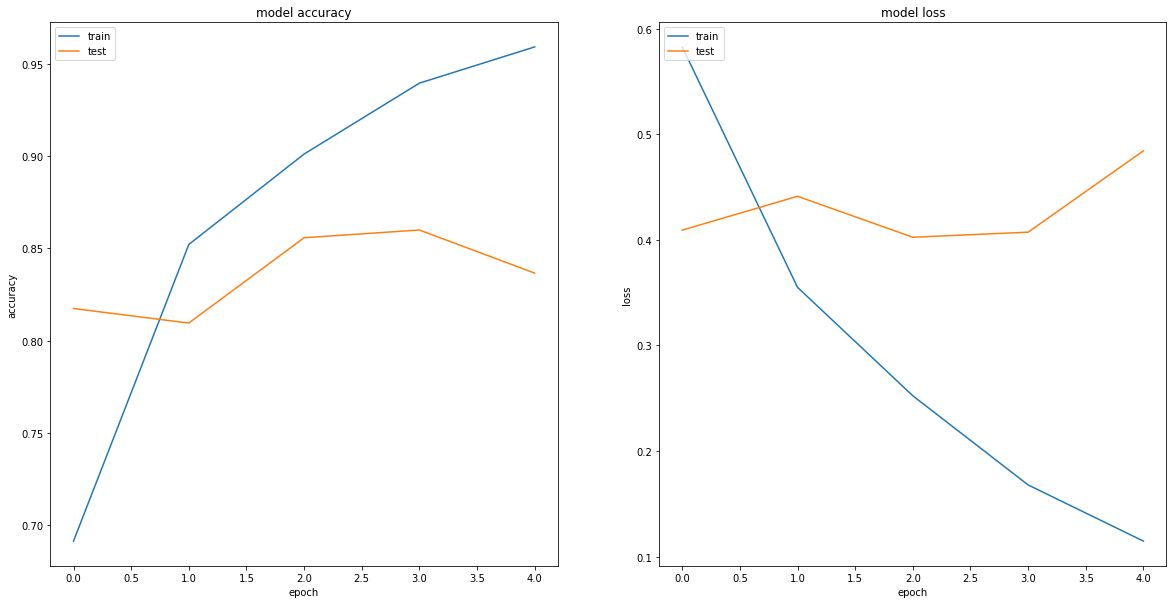

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_LSTM.evaluate(x_test,y_test)

608/608 [==============================] - 9s 14ms/step - loss: 0.4907 - accuracy: 0.8323


[0.4906608462333679, 0.8322879076004028]

**Remarques :** 

Avec cette architecture en LSTM de deux couches de 400 neurones avec un neurone de sortie avec une activation sigmoid on a une accuracy de test qui atteint les 85%.

## RNN LSTM bi-directionnel

In [ ]:

#tf.random.set_seed(11)
num_words = 8000
max_len   =  350

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)
# On padde les séquences

#print("La phrase avant padding est : \n {}". format(x_train[0]))
# On padde les séquence de mot
max_len       = 350
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

#print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))

###Déclaration du réseau

In [ ]:
model_LSTM_bi = Sequential()
embed_size = 150
model_LSTM_bi.add(Embedding(num_words, embed_size))
model_LSTM_bi.add(Bidirectional(LSTM(450, return_sequences = False)))
#model.add(Dropout(0.25))   
model_LSTM_bi.add(Dense(1,activation = 'sigmoid'))

# On affiche l'architecture de notre modèle
#model_LSTM.summary()

# On spécifie la fonction de perte, l'optimiseur, et la fonction d'évaluation
model_LSTM_bi.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])




In [ ]:
# On entraine le réseau
batch_size =  64                                                          # tailles des mini-batch
epochs = 5                                                                 # nombre d'époques
history3 = model_LSTM_bi.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/5
256/256 [==============================] - 43s 156ms/step - loss: 0.5290 - accuracy: 0.7408 - val_loss: 0.6073 - val_accuracy: 0.6711
Epoch 2/5
256/256 [==============================] - 39s 153ms/step - loss: 0.4209 - accuracy: 0.8089 - val_loss: 0.4172 - val_accuracy: 0.8111
Epoch 3/5
256/256 [==============================] - 39s 153ms/step - loss: 0.3173 - accuracy: 0.8707 - val_loss: 0.3864 - val_accuracy: 0.8390
Epoch 4/5
256/256 [==============================] - 39s 154ms/step - loss: 0.2320 - accuracy: 0.9097 - val_loss: 0.3901 - val_accuracy: 0.8627
Epoch 5/5
256/256 [==============================] - 39s 154ms/step - loss: 0.1631 - accuracy: 0.9409 - val_loss: 0.4257 - val_accuracy: 0.8507


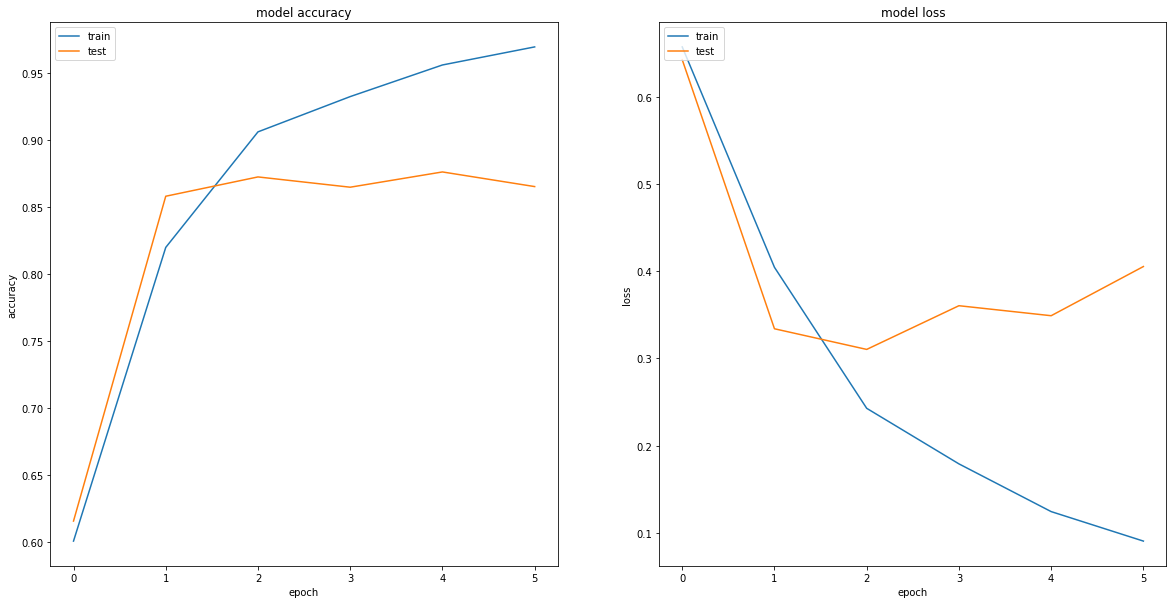

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Avec un LSTM bi-directionnel et avec une couche en moins on a quasiment les mêmes résultats

In [ ]:
model_LSTM_bi.evaluate(x_test,y_test)

682/682 [==============================] - 23s 33ms/step - loss: 0.4349 - accuracy: 0.8558


[0.4349171817302704, 0.8557930588722229]

## RNN LSTM-bi personnaliser

In [7]:

#tf.random.set_seed(11)
num_words = 18000
max_len   =  350

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)
# On padde les séquences

#print("La phrase avant padding est : \n {}". format(x_train[0]))
# On padde les séquence de mot
max_len       = 350
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

#print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))

In [8]:
model_LSTM_bi = Sequential()
embed_size = 300
model_LSTM_bi.add(Embedding(num_words, embed_size))
model_LSTM_bi.add(Dropout(0.25))  
model_LSTM_bi.add(Bidirectional(LSTM(450, return_sequences = False)))
model_LSTM_bi.add(Dropout(0.25))   
model_LSTM_bi.add(Dense(1,activation = 'sigmoid'))

# On affiche l'architecture de notre modèle
#model_LSTM.summary()

# On spécifie la fonction de perte, l'optimiseur, et la fonction d'évaluation
model_LSTM_bi.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])

In [9]:
# On entraine le réseau
batch_size =  64                                                          # tailles des mini-batch
epochs = 5                                                                 # nombre d'époques
history3 = model_LSTM_bi.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/5
256/256 [==============================] - 47s 163ms/step - loss: 0.5095 - accuracy: 0.7451 - val_loss: 0.4110 - val_accuracy: 0.8278
Epoch 2/5
256/256 [==============================] - 42s 165ms/step - loss: 0.2869 - accuracy: 0.8859 - val_loss: 0.3380 - val_accuracy: 0.8710
Epoch 3/5
256/256 [==============================] - 43s 168ms/step - loss: 0.2150 - accuracy: 0.9167 - val_loss: 0.4362 - val_accuracy: 0.8199
Epoch 4/5
256/256 [==============================] - 44s 171ms/step - loss: 0.1400 - accuracy: 0.9483 - val_loss: 0.4282 - val_accuracy: 0.8725
Epoch 5/5
256/256 [==============================] - 45s 174ms/step - loss: 0.0720 - accuracy: 0.9750 - val_loss: 0.5662 - val_accuracy: 0.8629


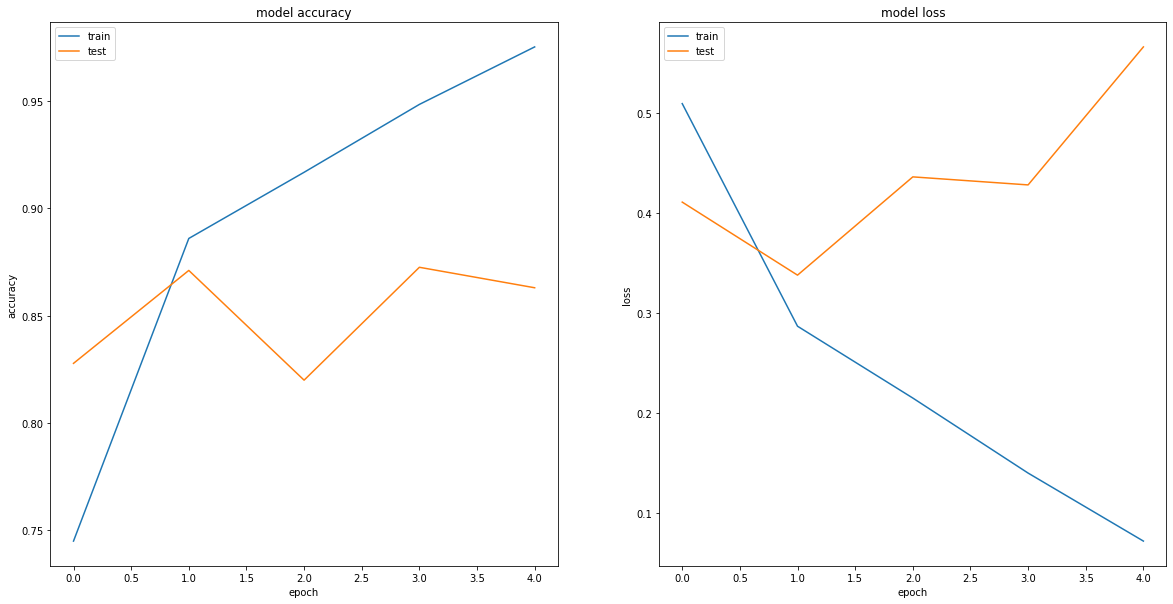

In [10]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model_LSTM_bi.evaluate(x_test,y_test)

650/650 [==============================] - 22s 34ms/step - loss: 0.6038 - accuracy: 0.8495


[0.6038042306900024, 0.849473237991333]

In [ ]:
model_GRU = Sequential()
embed_size = 150
model_GRU.add(Embedding(num_words, embed_size))
model_GRU.add(GRU(450, return_sequences = False))
model_GRU.add(Dropout(0.25))   
model_GRU.add(Dense(1,activation = 'sigmoid'))

model_GRU.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])


In [ ]:
# On entraine le réseau
batch_size =  64                                                          # tailles des mini-batch
epochs = 3                                                                 # nombre d'époques
history3 = model_GRU.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/3
256/256 [==============================] - 24s 66ms/step - loss: 0.5320 - accuracy: 0.7337 - val_loss: 0.4405 - val_accuracy: 0.7960
Epoch 2/3
256/256 [==============================] - 17s 66ms/step - loss: 0.3252 - accuracy: 0.8669 - val_loss: 0.3843 - val_accuracy: 0.8324
Epoch 3/3
256/256 [==============================] - 18s 72ms/step - loss: 0.2021 - accuracy: 0.9223 - val_loss: 0.3256 - val_accuracy: 0.8715


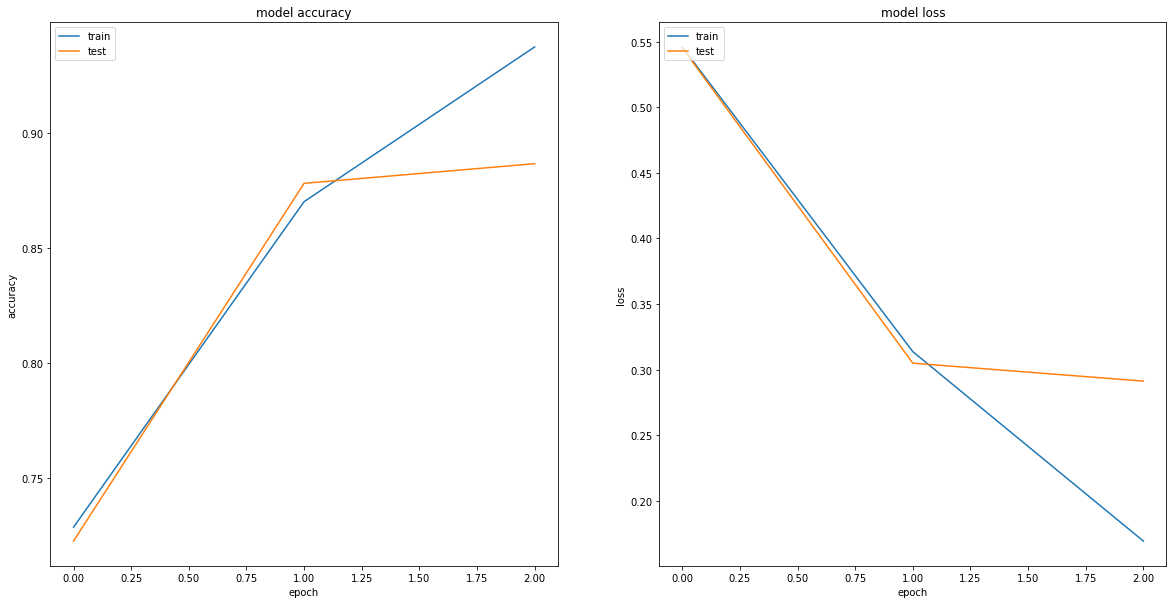

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_GRU.evaluate(x_test,y_test)

650/650 [==============================] - 10s 16ms/step - loss: 0.3080 - accuracy: 0.8837


[0.3080041706562042, 0.8836773037910461]

## Test de plusieurs Couches GRU

In [ ]:

#tf.random.set_seed(11)
num_words = 18000
max_len   =  450

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      maxlen=max_len)
# On padde les séquences

#print("La phrase avant padding est : \n {}". format(x_train[0]))
# On padde les séquence de mot
max_len       = 450
x_train       = pad_sequences(x_train, maxlen=max_len, truncating='post')
x_test        = pad_sequences(x_test, maxlen=max_len, truncating='post')

#print("La phrase paddée sur une longueur {} est : \n {}". format(max_len, x_train[0]))

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
model_GRU = Sequential()
embed_size = 200
model_GRU.add(Embedding(num_words, embed_size))
model_GRU.add(GRU(450, return_sequences = True))
model_GRU.add(GRU(200, return_sequences = False))
model_GRU.add(Dropout(0.3))   
model_GRU.add(Dense(1,activation = 'sigmoid'))

model_GRU.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.00078, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['accuracy'])

In [ ]:
# On entraine le réseau
batch_size =  32                                                          # tailles des mini-batch
epochs = 2                                                                 # nombre d'époques
history3 = model_GRU.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # on entraine

Epoch 1/2
558/558 [==============================] - 54s 82ms/step - loss: 0.6299 - accuracy: 0.6782 - val_loss: 0.3284 - val_accuracy: 0.8542
Epoch 2/2
558/558 [==============================] - 47s 84ms/step - loss: 0.2369 - accuracy: 0.9048 - val_loss: 0.2547 - val_accuracy: 0.9013


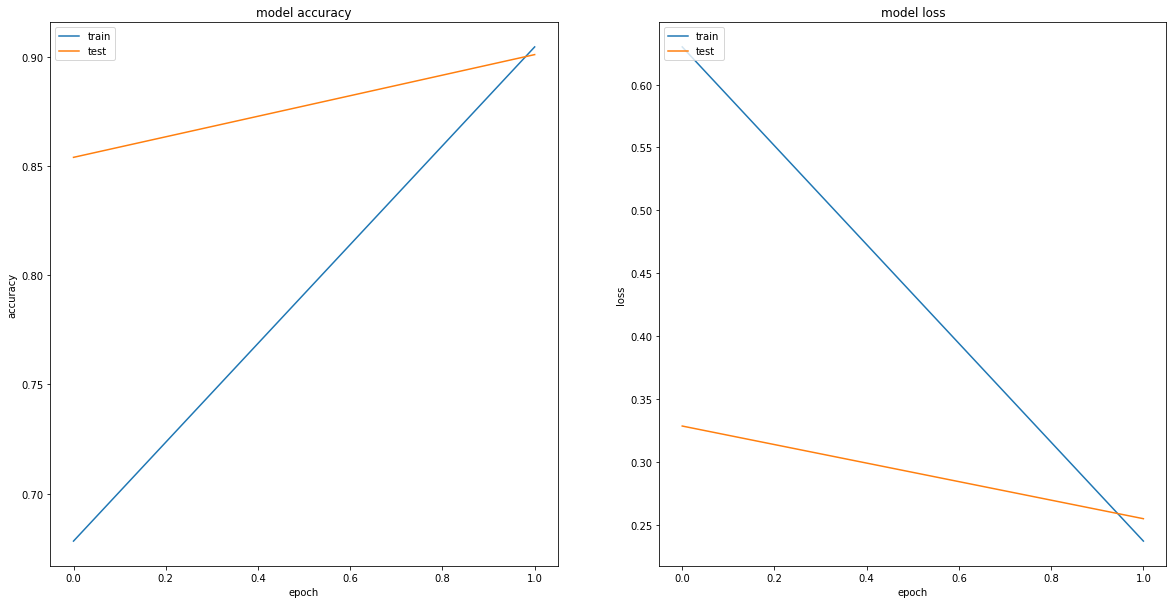

In [ ]:
# On trace la loss et l'accuracy du modèle
# On trace l'évolution de l'accuracy
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# On trace l'évolution de la loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_GRU.evaluate(x_test,y_test)

705/705 [==============================] - 21s 30ms/step - loss: 0.2707 - accuracy: 0.8935


[0.2706567943096161, 0.8935480713844299]